# DS в разведке и добыче нефти

**Цель проекта:**

Разработать оптимальный план похода за артефактами, который поможет героям предсказывать сроки и оптимизировать процесс поиска артефактов, учитывая сложные геологические и технические условия подземных рудников.

**Задачи проекта:**

 - Анализ данных (EDA):

    - Провести детальный анализ собранных данных для выявления закономерностей и взаимосвязей между признаками и целевой переменной.
    -Определить важные признаки, которые могут влиять на срок поиска артефактов.
 - Предобработка данных:

    - Очистить и подготовить данные для обучения модели, включая обработку пропусков, кодирование категориальных переменных и нормализацию числовых признаков.
- Разработка модели машинного обучения:

    - Выбрать и обучить несколько моделей машинного обучения для предсказания срока поиска артефактов.
    - Провести настройку гиперпараметров для достижения наилучших результатов.
 - Оценка моделей:

    - Оценить производительность моделей с использованием различных метрик, таких как  R².
    - Выбрать наилучшую модель на основе её производительности на тестовой выборке.
- Интерпретация результатов:

    - Провести анализ важности признаков для понимания того, какие факторы наиболее существенно влияют на сроки поиска артефактов.
    - Предоставить рекомендации по оптимизации процесса поиска на основе полученных результатов.
- Визуализация данных:

    - Создать визуализации для представления результатов анализа и предсказаний, чтобы сделать выводы более доступными для понимания.


Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Загружаем данные и выводим их

In [2]:
df = pd.read_csv('data.csv')
df

,Наименование королевства,Наименование земли,Наименование хребта,Наименование расщелины,Цель,Тип расщелины,Категория расщелины,Назначение расщелины,Участки,Тип отвилка,...,Количество простоев по зельям,Количество простоев в контроле поиска,Количество простоев в конце расщелины,Количество простоев по долбилам,Количество простоев по вине исследователей,Количество простоев по креплениям,Количество простоев (прочие),Общий путь поиска,Дата начала поиска,Дата окончания поиска
0,Кэдвен,Приобия,684,2903,поиск,наклонная,Нагнетательная,Магическое воздействие,верхнее укрепление+среднее укрепление+основное...,Материнский,...,2.7,0.0,0.0,0.0,0.0,0.0,0.0,2889.0,2162-12-23 15:00:17,2163-01-04 07:00:17
1,Темерия,Сутор,1141,1332,поиск,горизонтальная,Поисковая,NaN,верхнее укрепление+среднее укрепление+основное...,Материнский,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5620.5,2162-11-09 00:00:17,2163-01-05 04:30:17
2,Кэдвен,Приобия,18А.28,1027,поиск,наклонная,Поисковая,NaN,верхнее укрепление+среднее укрепление+основное...,Материнский,...,0.0,0.0,0.0,0.0,0.0,0.9,0.0,2600.1,2162-12-24 23:30:17,2163-01-06 02:30:17
3,Кэдвен,Приобия,9А.18,4208,поиск,наклонная,Поисковая,NaN,верхнее укрепление+среднее укрепление+основное...,Материнский,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2699.1,2162-12-24 12:00:17,2163-01-06 01:00:17
4,Кэдвен,Приобия,627,9352,поиск,наклонная,Нагнетательная,Магическое воздействие,верхнее укрепление+среднее укрепление+основное...,Материнский,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3195.0,2162-12-24 12:00:17,2163-01-07 19:00:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13411,Темерия,Итурия,715,3806,боковой отвилок,горизонтальная,Поисковая,Око Дракона,тупик,Боковой,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,985.5,2173-04-09 14:00:17,2173-04-30 17:00:17
13412,Темерия,Грейтвуд,1365,5419,поиск,горизонтальная,Поисковая,Око Дракона,,Материнский,...,0.0,0.0,0.0,0.0,0.0,0.9,0.0,4342.5,2173-04-01 21:00:17,2173-04-30 18:00:17
13413,Лирия и Ривия,Тазор,2.54,5309,поиск,многощельная,Поисковая,Око Дракона,среднее укрепление+основное укрепление,Дополнительный; Материнский,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4345.2,2173-04-14 02:00:17,NaN
13414,Темерия,Спорыш,1047,5515,боковой отвилок,наклонная,Поисковая,Око Дракона,тупик,Боковой,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1262.7,2173-04-08 09:00:17,2173-04-30 22:00:17


In [3]:
df.describe()

,Наименование расщелины,Количество труб,Количество дополнительных отвилков,Количество пилотных отвилков,Глубина по отвилку,Глубина первого отвилка,Путь поиска в первом отвилке,Общее время поиска,Общее время активного поиска,Общее время простоев,...,Количество простоев в поиске,Количество простоев в наклонном поиске,Количество простоев по зельям,Количество простоев в контроле поиска,Количество простоев в конце расщелины,Количество простоев по долбилам,Количество простоев по вине исследователей,Количество простоев по креплениям,Количество простоев (прочие),Общий путь поиска
count,13416.000000,11680.000000,13208.000000,13208.000000,12617.000000,1470.000000,1539.000000,13411.000000,13416.000000,11792.000000,...,12148.000000,12148.000000,12148.000000,12148.000000,12148.000000,12148.000000,12148.000000,12148.000000,12148.000000,13412.000000
mean,4987.281977,2.628724,0.557541,0.342974,3165.736214,1329.133776,1739.556361,28.007492,23.849386,5.600433,...,8.057030,0.985866,0.447703,0.027708,0.075642,0.142838,0.016521,0.201737,0.217147,3133.200039
std,2866.426983,1.092514,1.476816,0.824234,651.577145,771.236264,803.000472,18.445498,16.714226,10.324797,...,12.572276,2.117373,1.418976,0.229591,0.682784,0.683605,0.141181,0.770837,1.540230,1638.611417
min,1.000000,0.900000,0.000000,0.000000,0.000000,0.000000,36.900000,0.330000,0.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.300000
25%,2535.000000,1.800000,0.000000,0.000000,2750.400000,687.622500,1258.200000,17.360000,15.967500,0.830000,...,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2030.400000
50%,5048.000000,2.700000,0.000000,0.000000,3163.500000,1192.050000,1730.700000,24.230000,21.400000,2.315000,...,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3222.000000
75%,7497.000000,3.600000,0.000000,0.000000,3661.200000,1471.050000,2070.900000,32.850000,27.590000,5.890000,...,9.900000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3933.900000
max,9998.000000,7.200000,21.000000,8.000000,5931.000000,3949.200000,6412.500000,319.520000,635.870000,253.750000,...,325.800000,40.500000,44.100000,8.100000,54.900000,15.300000,3.600000,37.800000,118.800000,47044.800000


Используем команду descride для получения статистического описания числовых данных в DataFrame. Получим следующие значения:
- Количество ненулевых значений в столбце (count)
- Среднее значение столбца (mean)
- Стандартное отклонение (std)
- Минимальное значение (min)
- Значение, ниже которого находятся 25% данных (25%)
- Значение, ниже которого находятся 50% данных (50%)
- Значение, ниже которого находятся 75% данных (75%)
- Максимальное значение (max)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13416 entries, 0 to 13415
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Наименование королевства                    13416 non-null  object 
 1   Наименование земли                          13416 non-null  object 
 2   Наименование хребта                         13416 non-null  object 
 3   Наименование расщелины                      13416 non-null  int64  
 4   Цель                                        13416 non-null  object 
 5   Тип расщелины                               13414 non-null  object 
 6   Категория расщелины                         13416 non-null  object 
 7   Назначение расщелины                        10800 non-null  object 
 8   Участки                                     13416 non-null  object 
 9   Тип отвилка                                 13416 non-null  object 
 10  Технологич

Данная команда выводит основную информацию о DataFrame.
В том числе:
 - Количество строк *(13416)*
 - Количество столбцов *(53)*
 - Тип индекса *(RangeIndex)*
 - Тип данных *(float64, int64, object)*
 - Количество ненулевых значений *(заметим, много нулевых значений)*
 - Использование памяти *(5,4+ MB)*

In [5]:
df.isnull().sum()

Наименование королевства                          0
Наименование земли                                0
Наименование хребта                               0
Наименование расщелины                            0
Цель                                              0
Тип расщелины                                     2
Категория расщелины                               0
Назначение расщелины                           2616
Участки                                           0
Тип отвилка                                       0
Технологическая особенность                       0
Статус поиска                                   383
Помощник по контролю поиска                       0
Помощник по поиску                                0
Помощник по наклонным расщелинам                  0
Помощник по зельям                                0
Помощник по долбилам                              0
Помощник по исследованиям                         0
Помощник по укреплению                            0
Помощник по 

Проверяем количество пропущенных значений в каждом из признаков

In [6]:
# Преобразование столбцов в формат datetime
df['Дата начала поиска'] = pd.to_datetime(df['Дата начала поиска'], errors='coerce')
df['Дата окончания поиска'] = pd.to_datetime(df['Дата окончания поиска'], errors='coerce')


Так как нам необходимо найти "Срок поиска артефакта", то необходимо будет производить операции с признаками "Дата начала поиска" и "Дата окончания поиска", чтобы с их помощью в дальнейшем найти срок поиска.

Поэтому изменим их формат на дату.

In [7]:
df['Срок поиска артефакта'] = (df['Дата окончания поиска'] - df['Дата начала поиска']).dt.days

df.dropna(subset=['Срок поиска артефакта'], inplace=True)

Вычислим "Срок поиска артефакта" и удалим все полусченные пустые строки т.к. данный столбец является ключевым (целевой функцией) 

In [8]:
# Удаление ненужных столбцов
columns_to_drop = [
    'Дата начала поиска',
    'Дата окончания поиска',
    'Статус поиска',
    'Общее время поиска',
    'Количество брака',
    'Количество простоев по метеоусловиям',
    'Количество ремонтов',
    'Количество простоев',
    'Общее время активного поиска',
    'Количество геологических осложнений',
    'Количество аварий',
    'Количество простоев без виновника',
    'Количество простоев по вине королевства',
    'Количество простоев в поиске',
    'Количество простоев в наклонном поиске',
    'Количество простоев по зельям',
    'Количество простоев в контроле поиска',
    'Количество простоев в конце расщелины',
    'Количество простоев по долбилам',
    'Количество простоев по вине исследователей',
    'Количество простоев по креплениям',
    'Количество простоев (прочие)',
    'Количество осложнений',
    'Общее время простоев',
    'Глубина первого отвилка',
    'Путь поиска в первом отвилке'
]
df.drop(columns=columns_to_drop, inplace=True)

Удалим все признаки, которые мы не можем знать до начала поиска, такие как простои, аварии, брак и т.п.

Также удалим "Глубину первого отвилка" и "Путь поиска в первом отвилке", из-за большого количества пропусков (более 80%), т.к. данные признаки не дают нам достаточно данных для обучения модели. 

In [9]:
def count_outliers(df):
    outlier_counts = {}
    
    # Получаем список всех числовых столбцов
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Определяем границы для выбросов
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outlier_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
        outlier_counts[column] = outlier_count
    
    return outlier_counts
count_outliers(df)

{'Наименование расщелины': 0,
 'Количество труб': 2,
 'Количество дополнительных отвилков': 2369,
 'Количество пилотных отвилков': 2037,
 'Глубина по отвилку': 127,
 'Общий путь поиска': 238,
 'Срок поиска артефакта': 824}

Найдем количество выбросов во всех оставшихся числовых столбцах. 

Категориальные признаки не будем рассматривать т.к. мы не можем поменять их ни на медианное значение, ни на среднее.

array([[<Axes: title={'center': 'Наименование расщелины'}>,
        <Axes: title={'center': 'Количество труб'}>,
        <Axes: title={'center': 'Количество дополнительных отвилков'}>],
       [<Axes: title={'center': 'Количество пилотных отвилков'}>,
        <Axes: title={'center': 'Глубина по отвилку'}>,
        <Axes: title={'center': 'Общий путь поиска'}>],
       [<Axes: title={'center': 'Срок поиска артефакта'}>, <Axes: >,
        <Axes: >]], dtype=object)

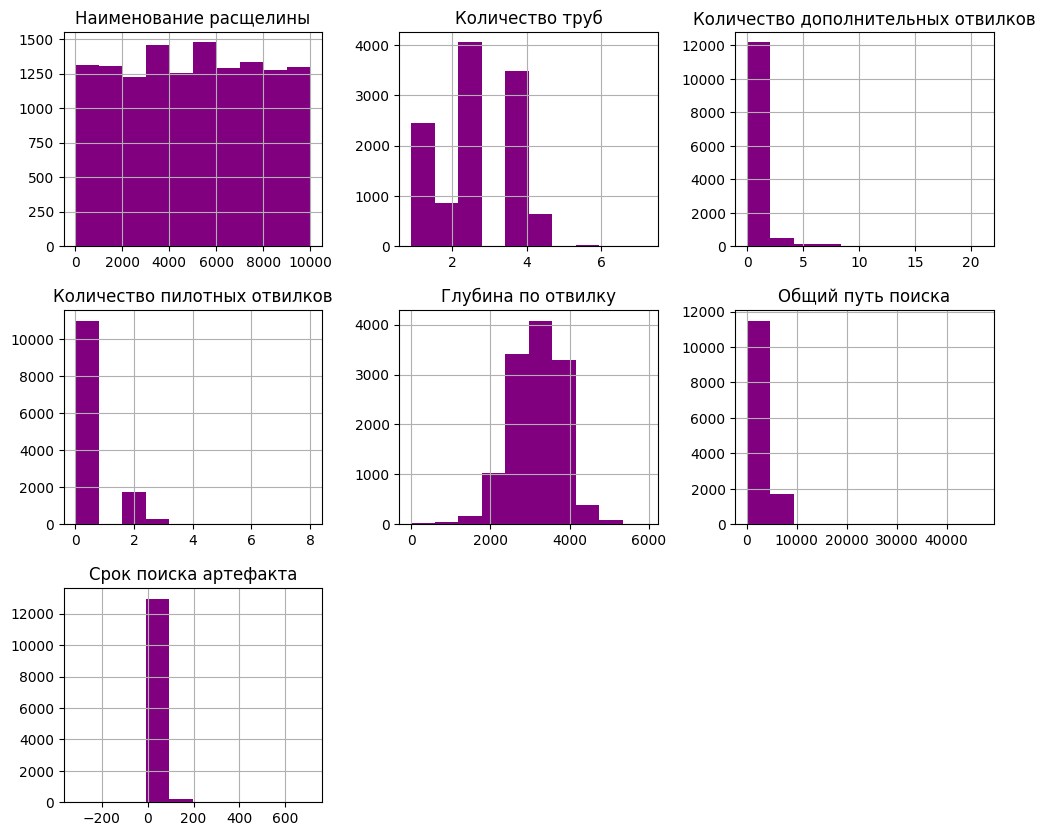

In [10]:


# Выбираем только числовые столбцы
numeric_features = df.select_dtypes(include=['number']).columns.tolist()

# Строим гистограммы для числовых признаков
df[numeric_features].hist(figsize=(12, 10), color='purple')

Проверим какое распределение у данных столбцов.

Если распределение нормальное (как у Глубины по отвилку), то будем заменять выбросы средним значением.

Если правостороннее (как у Количество дополнительных отвилков), будем заменять медианой.

In [11]:
# Вычисление 1-го и 3-го квартилей
Q1 = df['Глубина по отвилку'].quantile(0.25)
Q3 = df['Глубина по отвилку'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Вычисление медианы
mean_val = df['Глубина по отвилку'].mean()

# Замена выбросов на медиану
df['Глубина по отвилку'] = np.where(
    (df['Глубина по отвилку'] < lower_bound) | (df['Глубина по отвилку'] > upper_bound),
    mean_val,
    df['Глубина по отвилку']
)


Заменяем на среднее значение.

In [12]:
def replace_outliers_with_median(df, columns):
    for column in columns:
        # Вычисление Q1 и Q3
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Определение границ для выбросов
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Находим медиану
        median = df[column].median()
        
        # Замена выбросов на медиану
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
    
    return df

# Применение функции к вашему DataFrame
columns_to_check = [
    'Количество труб', 
    'Общий путь поиска'
]

# Предполагается, что ваш DataFrame называется data
df = replace_outliers_with_median(df, columns_to_check)


Заменяем на медиану

'Количество дополнительных отвилков' и 'Количество пилотных отвилков' не трогаем, т.к. в данных столбцах преобладает значение 0.0, поэтому малое количество других значений считаются выбросами.  Если это сделать, то все значения превратятся в 0 и данный столбец будет с единственным уникальным значением, соответственно не будет никак влять на обучение моделей.

In [13]:
def count_outliers(df):
    outlier_counts = {}
    
    # Получаем список всех числовых столбцов
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Определяем границы для выбросов
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outlier_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
        outlier_counts[column] = outlier_count
    
    return outlier_counts
count_outliers(df)

{'Наименование расщелины': 0,
 'Количество труб': 0,
 'Количество дополнительных отвилков': 2369,
 'Количество пилотных отвилков': 2037,
 'Глубина по отвилку': 18,
 'Общий путь поиска': 31,
 'Срок поиска артефакта': 824}

Повторно выводим выбросы.

In [14]:
df.isnull().sum()

Наименование королевства                 0
Наименование земли                       0
Наименование хребта                      0
Наименование расщелины                   0
Цель                                     0
Тип расщелины                            2
Категория расщелины                      0
Назначение расщелины                  2616
Участки                                  0
Тип отвилка                              0
Технологическая особенность              0
Помощник по контролю поиска              0
Помощник по поиску                       0
Помощник по наклонным расщелинам         0
Помощник по зельям                       0
Помощник по долбилам                     0
Помощник по исследованиям                0
Помощник по укреплению                   0
Помощник по огненным заклятиям           0
Помощник по подвескам                    0
Помощник по вырезке окна                 0
Тип инструмента                          0
Количество труб                       1710
Количество 

Проверяем количество пропущенных значений у оставшихся столбцов

In [15]:
df.isnull().sum()

Наименование королевства                 0
Наименование земли                       0
Наименование хребта                      0
Наименование расщелины                   0
Цель                                     0
Тип расщелины                            2
Категория расщелины                      0
Назначение расщелины                  2616
Участки                                  0
Тип отвилка                              0
Технологическая особенность              0
Помощник по контролю поиска              0
Помощник по поиску                       0
Помощник по наклонным расщелинам         0
Помощник по зельям                       0
Помощник по долбилам                     0
Помощник по исследованиям                0
Помощник по укреплению                   0
Помощник по огненным заклятиям           0
Помощник по подвескам                    0
Помощник по вырезке окна                 0
Тип инструмента                          0
Количество труб                       1710
Количество 

In [16]:
columns_to_check = ['Общий путь поиска', 'Тип расщелины', 'Количество пилотных отвилков', 'Количество дополнительных отвилков']

df = df.dropna(subset=columns_to_check)

Так как в столбцах 'Общий путь поиска', 'Тип расщелины', 'Количество пилотных отвилков', 'Количество дополнительных отвилков' количество пропусков небольшое, то удаляем строки с пустыми значениями.

Повторно проверяем количествол пропущенных значений

In [17]:
duplicates = df.duplicated()

# Подсчет количества дубликатов
num_duplicates = duplicates.sum()

# Вывод количества дубликатов
print(f"Количество дубликатов: {num_duplicates}")

Количество дубликатов: 0


Проверим датафрейм на дубликаты

In [18]:
unique_counts = df.nunique()
single_unique_columns = unique_counts[unique_counts == 1].index

# Количество столбцов с 1 уникальным значением
num_single_unique_columns = len(single_unique_columns)

# Вывод количества столбцов
print(f"Количество столбцов с 1 уникальным значением: {num_single_unique_columns}")




Количество столбцов с 1 уникальным значением: 0


Проверим на столбцы с единственным уникальным значением

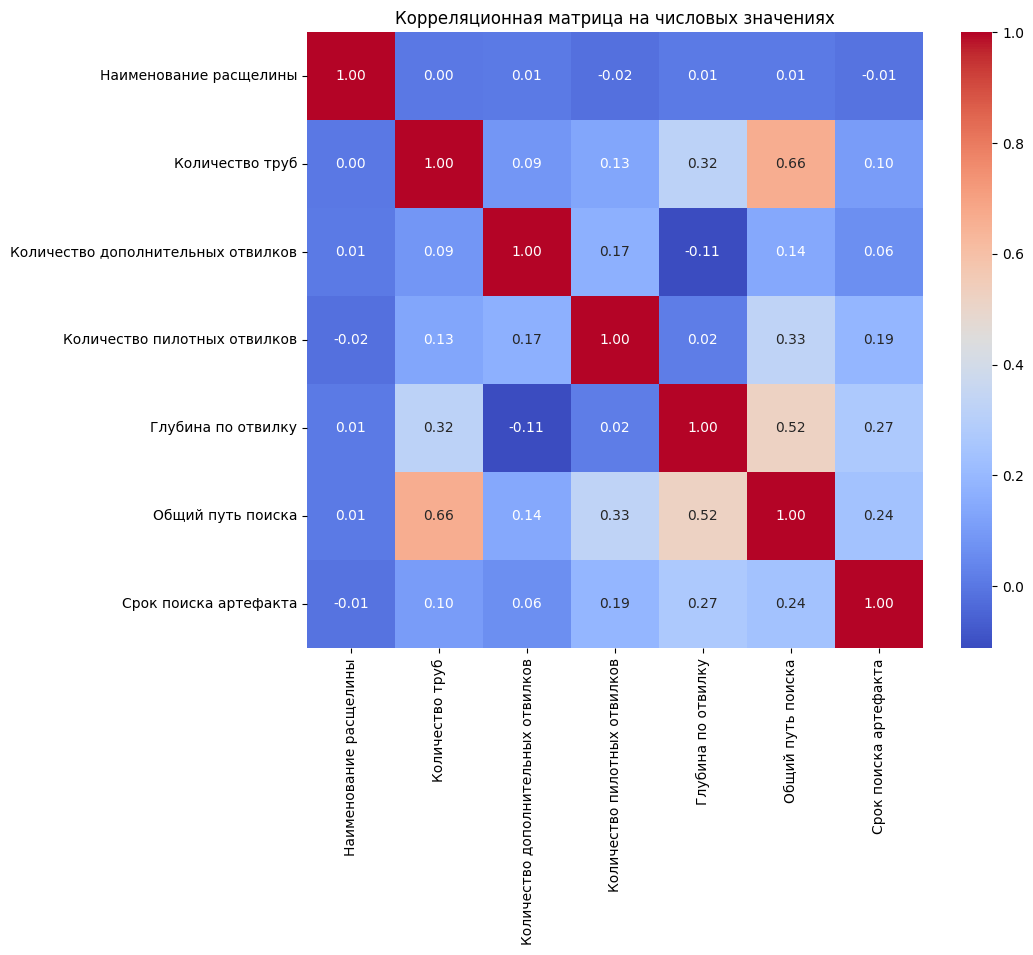

In [19]:
# Выбираем только числовые столбцы
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Вычисляем корреляционную матрицу
corr_matrix = numeric_df.corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Корреляционная матрица на числовых значениях')
plt.show()

Выведем корелляционную матрицу.

Заметим, что нет значений, которые сильно коррелируют друг с другом, поэтому ничего не удаляем

In [20]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Определение категориальных и числовых столбцов
categorical_columns = [
    'Наименование королевства', 
    'Наименование земли', 
    'Наименование хребта', 
    'Цель', 
    'Тип расщелины', 
    'Категория расщелины', 
    'Назначение расщелины', 
    'Участки', 
    'Тип отвилка', 
    'Технологическая особенность',
    'Помощник по контролю поиска', 
    'Помощник по поиску', 
    'Помощник по наклонным расщелинам', 
    'Помощник по зельям', 
    'Помощник по долбилам', 
    'Помощник по исследованиям', 
    'Помощник по укреплению', 
    'Помощник по огненным заклятиям', 
    'Помощник по подвескам', 
    'Помощник по вырезке окна', 
    'Тип инструмента'
]

numeric_columns = [
    'Количество труб', 
    'Количество дополнительных отвилков', 
    'Количество пилотных отвилков', 
    'Глубина по отвилку', 
    'Общий путь поиска', 
]

# Разделение данных на обучающую и тестовую выборки
X = df[categorical_columns + numeric_columns]  # Ваш DataFrame с данными
y = df['Срок поиска артефакта']  # Целевая переменная

for column in categorical_columns:
    X.loc[:, column] = X[column].fillna('missing')
# Разделяем данные на обучающую и тестовую выборки (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация модели CatBoostRegressor
catboost_model = CatBoostRegressor(cat_features=categorical_columns, verbose=False)

# Настройка параметров для поиска
parameters_catboost = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300]
}

# Настройка GridSearchCV
grid_search_cv_catboost = GridSearchCV(catboost_model, parameters_catboost, cv=5)

# Обучение модели
grid_search_cv_catboost.fit(X_train, y_train)

# Получение лучших параметров
best_params = grid_search_cv_catboost.best_params_
print("Best parameters:", best_params)

# Оценка модели на тестовой выборке
test_score = grid_search_cv_catboost.score(X_test, y_test)
train_score = grid_search_cv_catboost.score(X_train, y_train)
print("Score на тестовых данных:", test_score)
print("Score на тренировочных данных:", train_score)

Best parameters: {'depth': 8, 'iterations': 300, 'learning_rate': 0.1}
Score на тестовых данных: 0.4905864445525857
Score на тренировочных данных: 0.7076676354494509


Построим модель CatBoost, не изменяя категориальные переменные на числовые.

Настроим гиперпараметры и найдем R^2 на тестовых и тренировочных данных.

Разница между данными значениями, указывает на переобучение модели.

Значение  на тренировочных данных указывает на то, что модель правильно предсказывает целевую переменную для 70.77% случаев в тренировочном наборе. Это достаточно неплохой результат, но не слишком высокий.Хотя это значение не слишком высокое, оно может указывать на то, что модель не полностью использует информацию из данных или что данные могут быть сложными для предсказания.

Значение на тестовых данных указывает на то, что модель показывает значительно худшие результаты на тестовых данных, правильно предсказывая только 49.06% случаев. Это означает, что модель плохо обобщает свои знания на новые данные.Низкий score на тестовых данных по сравнению с тренировочными может указывать на переобучение или на то, что модель не подходит для данной задачи.

Cross-validation scores: [0.49643332 0.41790686 0.4436184  0.61898197 0.41404153]
Mean cross-validation score: 0.4781964158890453


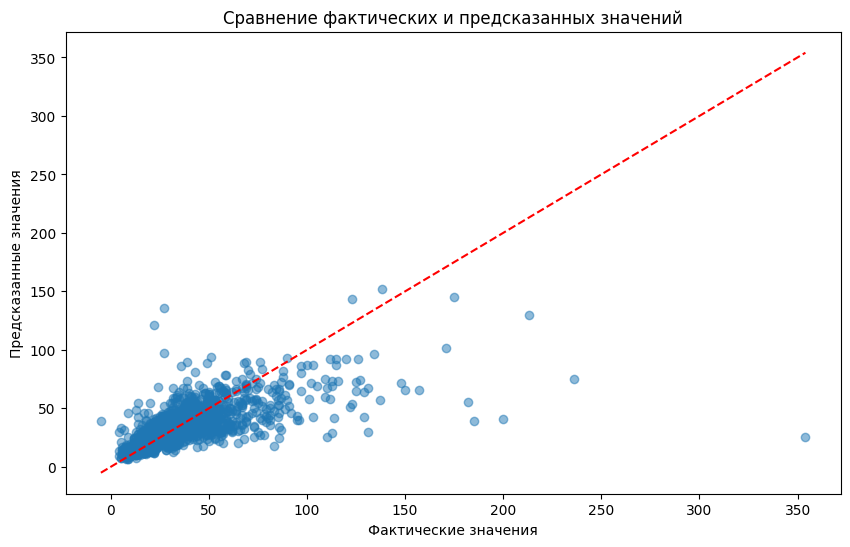

In [22]:
from sklearn.model_selection import cross_val_score, train_test_split
cv_scores = cross_val_score(grid_search_cv_catboost.best_estimator_, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Получение предсказаний на тестовой выборке
y_pred = grid_search_cv_catboost.predict(X_test)

# Построение графика предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение фактических и предсказанных значений')
plt.show()

на графике истинных и предсказанных значений точки сгруппированы в самом начале диагонали (обычно это линия y = x), это может означать следующее:

- Переобучение
- Недостаточная сложность модели
- Смещение

# Изменим категориальных данные на числовые 

In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Применение LabelEncoder ко всем текстовым столбцам
for column in df.select_dtypes(include=['object']).columns:
    df.loc[:, column] = label_encoder.fit_transform(df[column])

# Проверка результата
df

,Наименование королевства,Наименование земли,Наименование хребта,Наименование расщелины,Цель,Тип расщелины,Категория расщелины,Назначение расщелины,Участки,Тип отвилка,...,Помощник по огненным заклятиям,Помощник по подвескам,Помощник по вырезке окна,Тип инструмента,Количество труб,Количество дополнительных отвилков,Количество пилотных отвилков,Глубина по отвилку,Общий путь поиска,Срок поиска артефакта
0,5,94,513,2903,1,3,1,1,23,8,...,0,0,0,0,2.7,0.0,0.0,2889.0,2889.0,11.0
1,9,114,55,1332,1,1,5,5,30,8,...,0,0,0,0,3.6,2.0,0.0,3474.0,5620.5,57.0
2,5,94,180,1027,1,3,5,5,23,8,...,0,0,0,0,2.7,0.0,0.0,2596.5,2600.1,12.0
3,5,94,654,4208,1,3,5,5,23,8,...,0,0,0,0,2.7,0.0,0.0,2699.1,2699.1,12.0
4,5,94,485,9352,1,3,1,1,23,8,...,0,0,0,0,2.7,0.0,0.0,3193.2,3195.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13409,5,94,388,6315,1,3,5,3,45,9,...,0,0,0,43,3.6,0.0,2.0,NaN,3587.4,20.0
13410,8,78,104,9643,1,2,5,3,83,5,...,17,81,0,17,2.7,6.0,0.0,NaN,4447.8,50.0
13411,9,36,530,3806,0,1,5,3,99,0,...,0,81,0,55,0.9,0.0,0.0,NaN,985.5,21.0
13412,9,24,110,5419,1,1,5,3,0,8,...,0,19,0,42,NaN,0.0,0.0,NaN,4342.5,28.0


Воспользуемся LabelEncoder

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop('Срок поиска артефакта', axis=1)
y = df['Срок поиска артефакта']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Разделим данные на матрицу признаков (независимые переменные) и вектор целевой переменной (зависимую переменную). 

Создадим матрицу признаков *(X)*, которая содержит все столбцы df, кроме "Срок поиска артефакта".
В данном случае 'Срок поиска артефакта' — это целевая переменная, которую мы будем предсказывать, поэтому её нужно исключить из матрицы признаков *X*.

Создадим вектор целевой переменной *y*, который содержит значения столбца 'Срок поиска артефакта' из df.
Вектор *y* содержит значения, которые мы будем предсказывать с помощью модели. Это целевая переменная, которую модель будет пытаться объяснить с помощью признаков из матрицы *X*.

Разделим данные на тренировочный и тестовый наборы.

**Тренировочный набор** используется для обучения модели

**Тестовый набор** используется для оценки производительности модели. После обучения модели на тренировочном наборе, будем проверять на нем, насколько хорошо модель обобщает новые данные, которые не видела во время обучения.

**test_size=0.2** указывает, что 20% данных будут использоваться для тестового набора, а 80% — для тренировочного.

**random_state=42** задает начальное значение для генератора случайных чисел, чтобы разделение данных было детерминированным и воспроизводимым.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Инициализация модели XGBRegressor
clf_xgb = XGBRegressor()

# Определение параметров для поиска
parameters_xgb = {
    'xgbregressor__max_depth': [1, 2, 3],
    'xgbregressor__n_estimators': [50, 100, 200],
    'xgbregressor__learning_rate': [0.1, 0.2],
    'xgbregressor__subsample': [0.8, 1.0],
    'xgbregressor__min_child_weight': [1, 3, 5]
}

# Создание пайплайна
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Масштабирование данных
    ('xgbregressor', clf_xgb)      # Модель XGBRegressor
])

# Настройка GridSearchCV
grid_search_cv_xgb = GridSearchCV(pipeline, parameters_xgb, cv=5)

# Обучение модели
grid_search_cv_xgb.fit(X_train, y_train)

# Получение лучших параметров
best_params = grid_search_cv_xgb.best_params_
print("Best parameters:", best_params)

# Получение лучшей модели
best_model = grid_search_cv_xgb.best_estimator_

print('Score на тренировочных данных = ', round(best_model.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(best_model.score(X_test, y_test), 4))

Best parameters: {'xgbregressor__learning_rate': 0.2, 'xgbregressor__max_depth': 3, 'xgbregressor__min_child_weight': 1, 'xgbregressor__n_estimators': 200, 'xgbregressor__subsample': 1.0}
Score на тренировочных данных =  0.7265
Score на тестовых данных =  0.3231


Разница между Score на тренировочных данных и Score на тестовых данных указывает на то, что модель переобучена (overfitting). Переобучение происходит, когда модель слишком хорошо обучается на тренировочных данных, но плохо обобщается на новых данных (тестовых данных). В вашем случае, Score на тренировочных данных равен 0.7265, что выше, чем Score на тестовых данных, равный 0.3231.

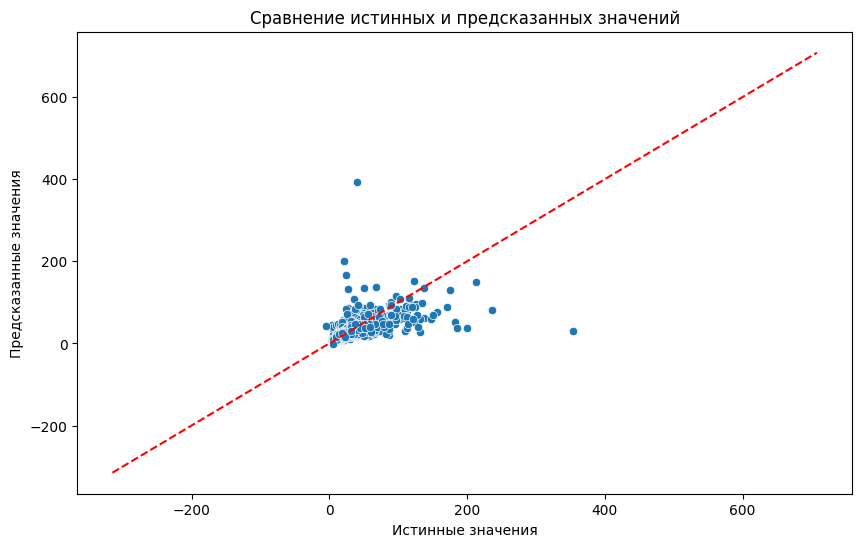

In [26]:
y_pred = grid_search_cv_xgb.predict(X_test)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

На графике истинных и предсказанных значений большинство точек сгруппировано ближе к центру, это может указывать на несколько вещей:
- Низкая вариативность данных
- Модель может быть недостаточно сложной для захвата всех зависимостей в данных
- Если модель имеет систематическую ошибку, она может предсказывать значения, которые слишком близки к среднему, что приводит к сгруппированным точкам в центре графика


In [27]:

# Определение сетки гиперпараметров
param_grid = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]
}

# Создание экземпляра GridSearchCV
grid_search = GridSearchCV(estimator=CatBoostRegressor(verbose=0, random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Обучение модели с поиском лучших гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print(f"Best parameters: {grid_search.best_params_}")

# Предсказание на тестовых данных с использованием лучшей модели
y_pred = grid_search.predict(X_test)

# Вывод метрик
print('Score на тренировочных данных = ', round(grid_search.best_estimator_.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(grid_search.best_estimator_.score(X_test, y_test), 4))

Best parameters: {'depth': 5, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.2}
Score на тренировочных данных =  0.8059
Score на тестовых данных =  0.3717


показатель указывает на то, что модель показывает высокую производительность на тренировочных данных. Значение 0.8152 (или 81.52%) означает, что модель правильно предсказывает целевую переменную для 81.52% случаев в тренировочном наборе.
Высокий score на тренировочных данных может свидетельствовать о переобучении (overfitting), если модель слишком хорошо запомнила данные, но не может обобщать на новые, невидимые данные.


Значение 0.4218 (или 42.18%) указывает на то, что модель значительно хуже справляется с предсказаниями на тестовых данных. Это может означать, что модель не смогла обобщить свои знания на новые данные.Низкий score на тестовых данных по сравнению с тренировочными может быть признаком переобучения, когда модель слишком сложная и адаптирована под шум и особенности тренировочного набора.

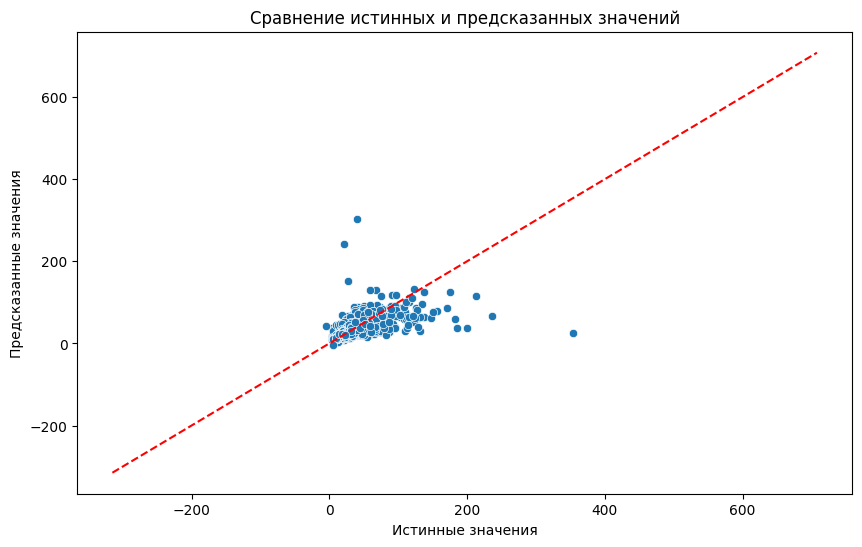

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

Аналогичная ситуация, что и с XGBoost.

In [35]:
from sklearn.model_selection import cross_val_score, train_test_split
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обработка категориальных переменных для XGBRegressor
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Инициализация моделей
xgb_model = XGBRegressor()
catboost_model = CatBoostRegressor(verbose=False, cat_features=X_train.select_dtypes(include=['object']).columns.tolist())

# Кросс-валидация
cv_xgb = cross_val_score(xgb_model, X_train_encoded, y_train, cv=5, scoring='r2')
cv_catboost = cross_val_score(catboost_model, X_train, y_train, cv=5, scoring='r2')

print(f'Кросс-валидация XGBoost: {round(cv_xgb.mean(), 4)}')
print(f'Кросс-валидация CatBoost: {round(cv_catboost.mean(), 4)}')

Кросс-валидация XGBoost: 0.4715
Кросс-валидация CatBoost: 0.4763


# Выводы

**Сравнение моделей без преобразования данных:**

**CatBoost** показывает Score на тестовых данных 0.4906 и Score на тренировочных данных 0.7077, что указывает на хорошую способность модели предсказывать на тренировочных данных, но с заметным ухудшением на тестовых. Это может свидетельствовать о переобучении, так как модель слишком хорошо запомнила тренировочные данные.
Кросс-валидация для CatBoost составляет 0.4782, что также указывает на недостаточное обобщение модели.
Сравнение моделей с преобразованием данных:

После преобразования данных, CatBoost показывает Score на тренировочных данных 0.8059 и Score на тестовых данных 0.3717, что указывает на ещё большее переобучение. Модель хорошо работает на тренировочных данных, но значительно хуже на тестовых.
XGBoost демонстрирует аналогичную картину: Score на тренировочных данных 0.7265 и Score на тестовых данных 0.3231. Это также свидетельствует о переобучении, хотя и на меньшем уровне по сравнению с CatBoost.
Кросс-валидация для обеих моделей остаётся на уровне 0.4715 (XGBoost) и 0.4763 (CatBoost), что подтверждает их ограниченные способности к обобщению.
Графическое представление результатов:

В первом случае (без преобразования данных) точки на графике сгруппированы близко к началу диагонали, что указывает на то, что модели предсказывают значения, близкие к нулю. Это может означать, что модель не захватывает сложные зависимости в данных.
Во втором случае (с преобразованием данных) точки сгруппированы ближе к середине диагонали, что указывает на более широкий диапазон предсказаний, но также на ухудшение точности, особенно на тестовых данных.

**Общие выводы**
Модели CatBoost и XGBoost показывают ограниченные результаты предсказания, как на тренировочных, так и на тестовых данных. Это указывает на проблемы с обобщающей способностью моделей, что может затруднить их применение для предсказания сроков и оптимизации процесса поиска артефактов.

**Причины низкой производительности моделей
Переобучение:**

- Модели показывают значительно лучшие результаты на тренировочных данных по сравнению с тестовыми. Это указывает на то, что они запомнили конкретные примеры из тренировочного набора, но не могут обобщать на новых данных.
Качество данных:

- Низкое качество данных, включая шум, пропуски или нерелевантные признаки, может негативно сказаться на производительности моделей. Если данные содержат много ненужной информации, это может усложнить процесс обучения.
Сложность зависимости:

- Сложные взаимосвязи между признаками и целевой переменной могут не быть уловлены моделями. Возможно, данные требуют более сложных подходов для выявления этих зависимостей.
Недостаток данных:

- Небольшое количество обучающих примеров может привести к переобучению и недостаточному обобщению. Если данные не представляют все возможные сценарии, модели могут не справляться с предсказанием.
Неподходящие модели:

- Выбранные модели могут не подходить для данной задачи. Например, если данные имеют сложные нелинейные зависимости, может потребоваться использование более сложных архитектур или методов.

К сожалению, не удалось обучить модель таким образом, чтобы она хорошо предсказывала результаты. Несмотря на проведенные эксперименты и попытки оптимизации, модели CatBoost и XGBoost не продемонстрировали удовлетворительной обобщающей способности на тестовых данных. 

Следует продолжать искать более эффективные подходы и методы, чтобы достичь поставленных целей в предсказании сроков и оптимизации процесса поиска артефактов.